In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import scipy.stats
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
listings = pd.read_csv("test_data/listings_shorted.csv", sep=",")
sigVars = ['GUID','REGISTRATION_YEAR', 'MILEAGE', 'POWER_IN_KW', 'HORSEPOWER', 'GEARING_TYPE',
       'WARRANTY',
       'PRICE_PUBLIC', 'CYLINDERS', 'EMISSION_CLASS', 'PRIMARY_FUEL_TYPE',
       'CONSUMPTION_HIGHWAY', 'CONSUMPTION_CITY', 'CONSUMPTION_MIXED',
       'ELECTRIC_CONSUMPTION_MIXED', 'EFFICIENCY_CLASS', 'CO2_EMISSION', 'EMISSION_STICKER']
listings_processed = listings[sigVars]
numericVars = ['MILEAGE','POWER_IN_KW', 'HORSEPOWER',
       'PRICE_PUBLIC',
       'CYLINDERS',
       'CONSUMPTION_HIGHWAY', 'CONSUMPTION_CITY', 'CONSUMPTION_MIXED',
       'CO2_EMISSION']
listings_numeric = listings[numericVars]

In [3]:
print(listings_numeric)

     MILEAGE  POWER_IN_KW  HORSEPOWER  PRICE_PUBLIC  CYLINDERS  \
0     210000           75         102          3400        4.0   
1     156000          125         170         16000        4.0   
2      19531          101         137         18450        3.0   
3      49000           92         125         14200        NaN   
4      85520          103         140          7990        4.0   
..       ...          ...         ...           ...        ...   
431   161000           81         110          2900        4.0   
432   131000          140         190          8250        4.0   
433    35500          287         390         54000        6.0   
434    34556          287         390         54950        6.0   
435    44000          485         659         84990        8.0   

     CONSUMPTION_HIGHWAY  CONSUMPTION_CITY  CONSUMPTION_MIXED  CO2_EMISSION  
0                    6.0              10.5                7.7         185.0  
1                    5.6               7.3         

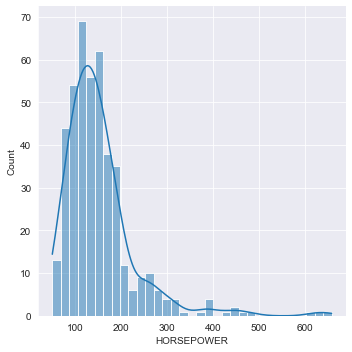

In [4]:
sns.displot(listings_numeric['HORSEPOWER'], kde = True, stat = 'count')

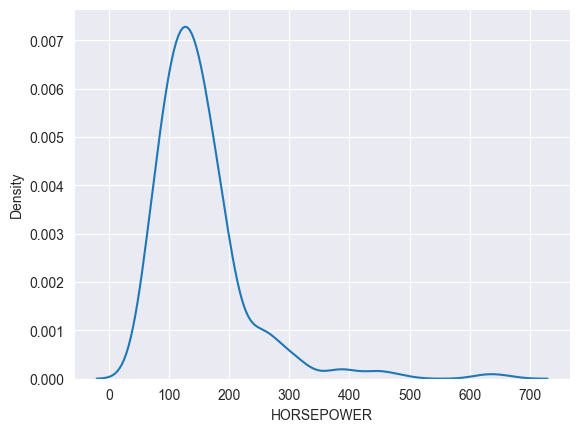

In [15]:
# x,y = sns.distplot(listings_numeric['HORSEPOWER'], hist=False).get_lines()[0].get_data()
x,y = sns.kdeplot(listings_numeric['HORSEPOWER']).get_lines()[0].get_data()


In [16]:
print(x)

[-20.61467362 -16.8446769  -13.07468018  -9.30468346  -5.53468674
  -1.76469002   2.0053067    5.77530342   9.54530014  13.31529686
  17.08529358  20.8552903   24.62528702  28.39528374  32.16528045
  35.93527717  39.70527389  43.47527061  47.24526733  51.01526405
  54.78526077  58.55525749  62.32525421  66.09525093  69.86524765
  73.63524437  77.40524109  81.17523781  84.94523453  88.71523125
  92.48522797  96.25522469 100.02522141 103.79521813 107.56521485
 111.33521157 115.10520829 118.87520501 122.64520173 126.41519845
 130.18519517 133.95519189 137.72518861 141.49518533 145.26518205
 149.03517877 152.80517549 156.57517221 160.34516893 164.11516565
 167.88516237 171.65515909 175.42515581 179.19515253 182.96514925
 186.73514597 190.50514269 194.27513941 198.04513613 201.81513285
 205.58512957 209.35512629 213.12512301 216.89511973 220.66511645
 224.43511317 228.20510989 231.97510661 235.74510333 239.51510005
 243.28509677 247.05509348 250.8250902  254.59508692 258.36508364
 262.13508

In [22]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
        The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """

    o = len(coeffs)
    rev_coeffs = coeffs[::-1]
    print(f'# This is a polynomial of order {o}.')
    y = 0
    for i in range(o):
        y += rev_coeffs[i] * x ** i

    return y

# This is a polynomial of order 11.


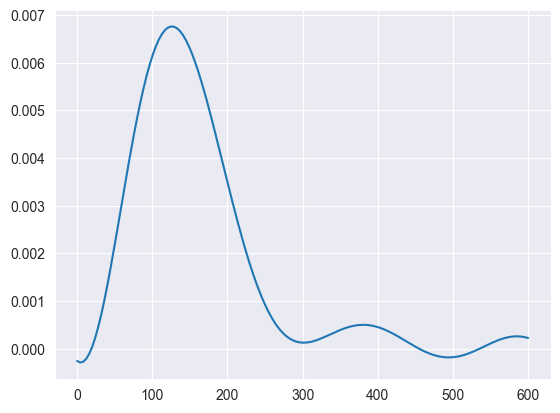

In [26]:
coeffs10 = np.polyfit(x,y, 10)
fx = np.linspace(0,600,150)
function = PolyCoefficients(fx, coeffs10)

plt.plot(fx, function)
plt.show()


In [9]:
svrrbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

lw = 2

svrs = [svrrbf]
kernel_label = ["RBF"]
model_color = ["m"]

In [10]:
x = x.reshape(-1,1)
#y = y.reshape(-1,1)
y = y.ravel()
# print(x)

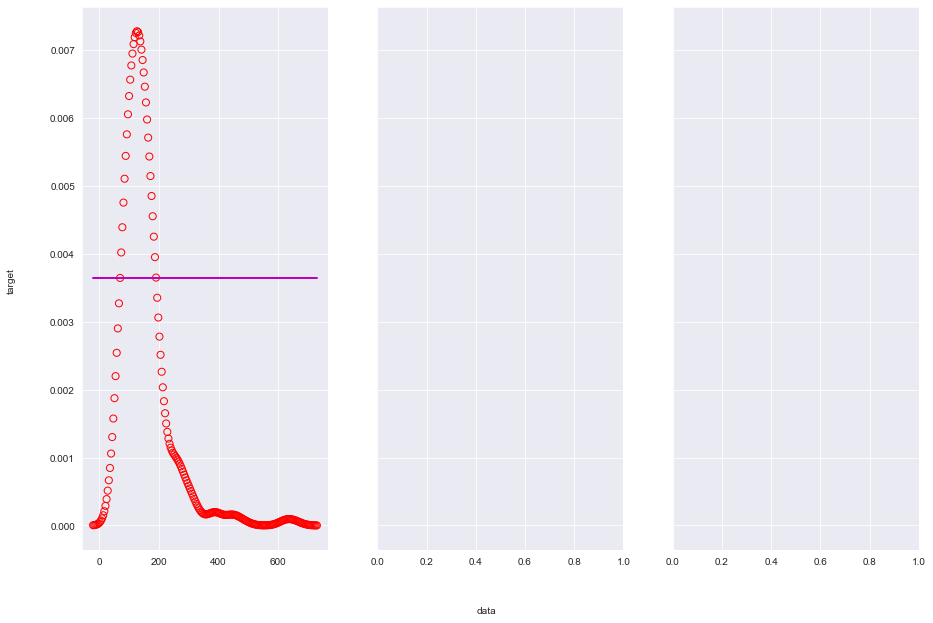

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x,
        svr.fit(x, y).predict(x),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)],
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none",
        edgecolor="r",
        s=50,
        label="other training data",
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
plt.show()

In [13]:

x_data, y_data = (listings_numeric["HORSEPOWER"].values, listings_numeric["HORSEPOWER"].values)
c = Counter(listings_numeric["HORSEPOWER"])

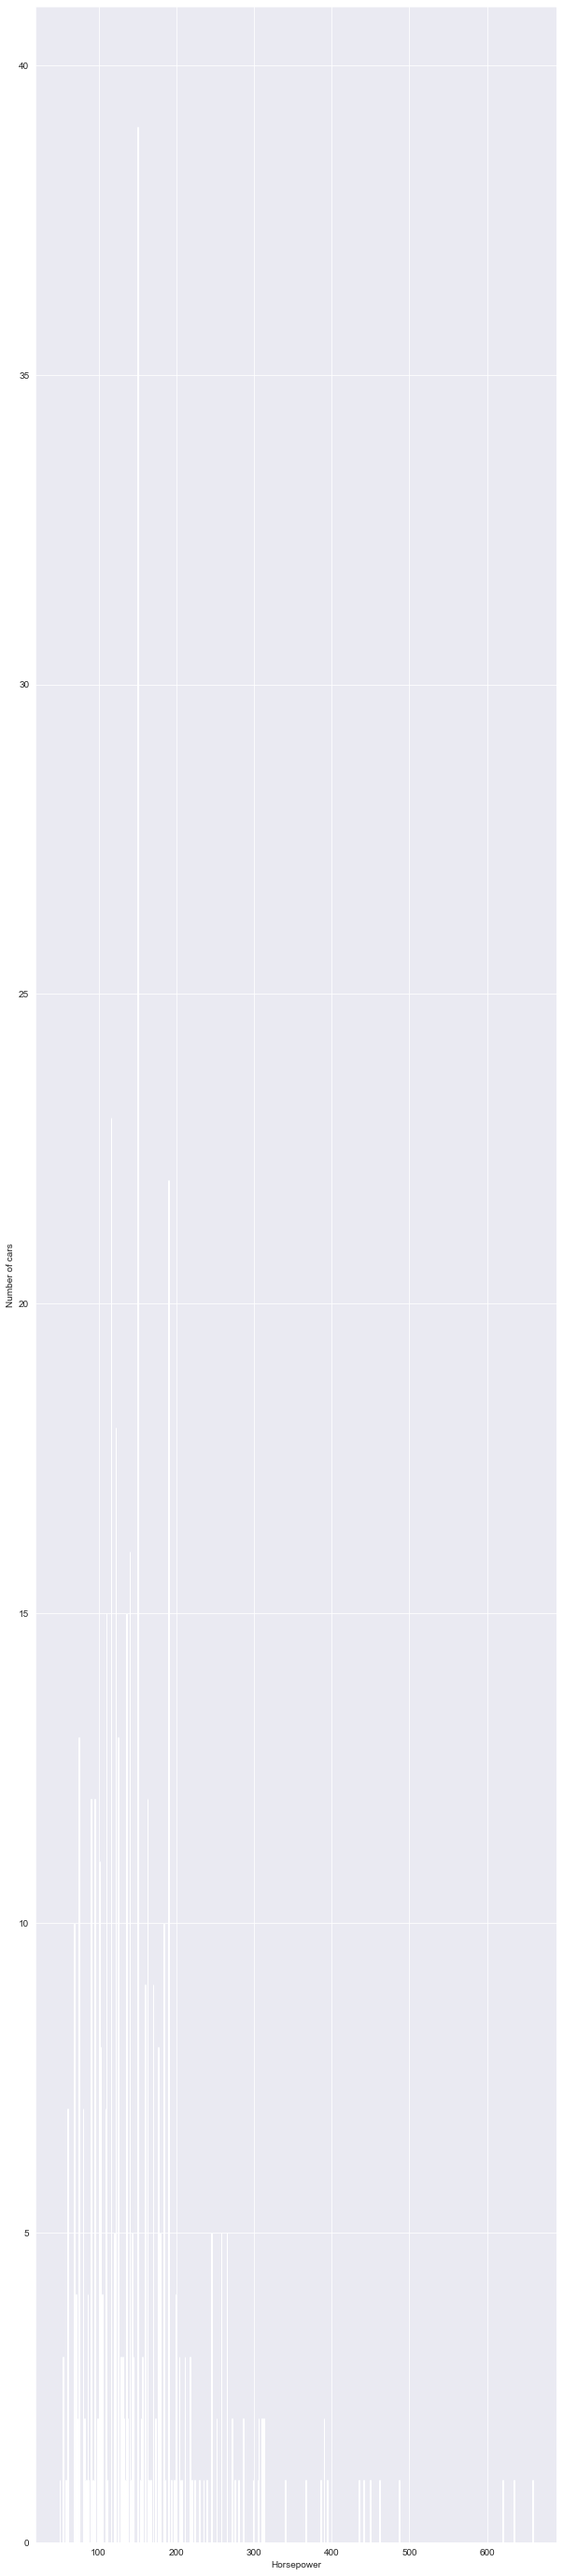

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(10,50))
#plt.plot(x_data, y_data, 'ro')
plt.bar(c.keys(), c.values())
plt.ylabel('Number of cars')
plt.xlabel('Horsepower')
plt.show()
plt.tight_layout()

In [15]:
x_data, y_data = c.keys(), c.values()

In [16]:
def sigmoid(x, Beta_1, Beta_2):
    for i in range(int(Beta_2)):
        y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
beta1 = 0.10
beta2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta1 , beta2)

plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

TypeError: 'float' object is not iterable